<a href="https://colab.research.google.com/github/Rap82/Goit_Home_Data_Science__DZ_all/blob/main/Hw7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашння робота № 8

# Завдання
Візьміть датасет https://grouplens.org/datasets/movielens/latest/ і побудуйте модель матричної факторизації. У даній бібліотеці він має назву SVD. Підберіть найкращі параметри за допомогою крос-валідації, також поекспериментуйте з іншими алгоритмами розрахунків (SVD++, NMF) і оберіть той, який буде оптимальним.

In [ ]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357262 sha256=f01f34656d41daaa1a02edf92fe679e752c9dd4fafbed18010bbcab2e25218d7
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
from surprise import SVD, SVDpp, NMF
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from hyperopt import hp, fmin, tpe
import pandas as pd

## Завантаження та створення запропонованого датасету "ml-100k" для дослідження.

In [ ]:
data = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


# Формуємо навчальні і тестові дані для нашої моделі  trainset and testset

In [ ]:
# testset= 0.25 .Тестовий набір складає 25% від усіх оцінок, що дозволяє забезпечити адекватну оцінку моделі без надлишкової залежності
# від навчальних даних.
train_set, test_set = train_test_split(data, test_size=0.25)

# Mоделі матричної факторизації

## Показники які будемо аналізувати для запропонованих алгоритмів
**RMSE** - root-mean-square error   (Середньоквадратична помилка)    
**MAE** - mean absolute error (Середнє абсолютне відхилення)  
**Fit Time** (Час навчання)   
**Test Time** (Час тестування)   

## Algorithm SVD.   
Метод SVD може бути адаптований до наборів даних з неявним зворотним зв'язком (implicit feedback).  



Розрахуємо точність моделі за допомогою алгоритму **SVD** на основі тренувальних і тестових даних **train_set**, **test_set**

In [ ]:
import time

start_time = time.time()  # Початок вимірювання часу
svd_train = SVD(random_state=42).fit(train_set) # Навчання моделі на даних train_set
end_time = time.time()  # Кінець вимірювання часу
execution_time_SVD = end_time - start_time  # Час виконання

svd_predict = svd_train.test(test_set) # Прогнозування на даних test_set
svd_rmse = accuracy.rmse(svd_predict,verbose=True) # Визначення точності моделі методом rmse
svd_mse = accuracy.mse(svd_predict,verbose=True) # Визначення точності моделі методом mse
print(f"Час затрачений на навчання Algorithm SVD : {execution_time_SVD:.4f} секунд")


RMSE: 0.9349
MSE: 0.8740
Час затрачений на навчання Algorithm SVD : 1.2941 секунд


### Крос-валідація для алгоритму SVD

In [ ]:
SVD_result = cross_validate(SVD(random_state=42), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
SVD_result = pd.DataFrame.from_dict(SVD_result).mean(axis=0)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9315  0.9408  0.9382  0.9300  0.9380  0.9357  0.0042  
MAE (testset)     0.7338  0.7407  0.7387  0.7324  0.7401  0.7371  0.0034  
Fit time          3.71    1.54    1.55    1.51    1.53    1.97    0.87    
Test time         0.14    0.19    0.33    0.21    0.17    0.21    0.07    


## Algorithm SVD++ (SVDpp)   
Алгоритм SVD++ можна використовувати, коли ми маємо доступ як до явного (explicit), так і до неявного (implicit) зворотного зв'язку. Це може бути дуже корисно, тому що зазвичай користувачі взаємодіють з багатьма елементами ( неявний зворотній зв'язок), але оцінюють лише невелику підмножину з них ( явний зворотній зв'язок).

Розрахуємо точність моделі за допомогою алгоритму **SVD++ (SVDpp)**  на основі тренувальних і тестових даних **train_set**, **test_set**

In [ ]:
start_time = time.time()  # Початок вимірювання часу
svdpp_train = SVDpp(random_state=42).fit(train_set)# Навчання моделі на даних train_set
end_time = time.time()  # Кінець вимірювання часу
execution_time_SVDpp = end_time - start_time  # Час виконання

svdpp_predict = svdpp_train.test(test_set)# Прогнозування на даних test_set
svdpp_rmse = accuracy.rmse(svdpp_predict,verbose=True)# Визначення точності моделі методом rmse
svdpp_mse = accuracy.mse(svdpp_predict,verbose=True)# Визначення точності моделі методом mse
print(f"Час затрачений на навчання Algorithm SVD++ (SVDpp) : {execution_time_SVDpp:.4f} секунд")

RMSE: 0.9168
MSE: 0.8405
Час затрачений на навчання Algorithm SVD++ (SVDpp) : 26.4428 секунд


### Крос-валідація для алгоритму **SVDpp**

In [ ]:
SVDpp_result = cross_validate(SVDpp(random_state=42), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
SVDpp_result = pd.DataFrame.from_dict(SVDpp_result).mean(axis=0)

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9183  0.9234  0.9210  0.9245  0.9138  0.9202  0.0038  
MAE (testset)     0.7168  0.7234  0.7246  0.7271  0.7162  0.7216  0.0044  
Fit time          27.30   27.27   27.61   27.39   27.73   27.46   0.18    
Test time         4.44    5.59    4.54    5.75    4.50    4.96    0.58    


## Algorithm NMF

### **NMF (Non-negative Matrix Factorization) **— це метод факторизації матриць, який розкладає не від'ємну матрицю на добуток двох (або більше) не від'ємних матриць. Цей алгоритм часто використовується в задачах обробки даних, таких як розпізнавання образів, рекомендовані системи та тематичне моделювання.

In [ ]:
start_time = time.time()  # Початок вимірювання часу
NMF_train = NMF(random_state=42).fit(train_set)# Навчання моделі на даних train_set
end_time = time.time()  # Кінець вимірювання часу
execution_time_NMF = end_time - start_time  # Час виконання

NMF_predict = NMF_train.test(test_set)# Прогнозування на даних test_set
NMF_rmse = accuracy.rmse(NMF_predict,verbose=True)# Визначення точності моделі методом rmse
NMF_mse = accuracy.mse(NMF_predict,verbose=True)# Визначення точності моделі методом mse
print(f"Час затрачений на навчання Algorithm NMF : {execution_time_NMF:.4f} секунд")

RMSE: 0.9639
MSE: 0.9290
Час затрачений на навчання Algorithm NMF : 2.3587 секунд


In [ ]:
NMF_result = cross_validate(NMF(random_state=42), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
NMF_result = pd.DataFrame.from_dict(NMF_result).mean(axis=0)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9576  0.9588  0.9631  0.9596  0.9630  0.9604  0.0022  
MAE (testset)     0.7515  0.7557  0.7583  0.7538  0.7579  0.7554  0.0025  
Fit time          4.14    2.31    2.32    2.27    3.21    2.85    0.74    
Test time         0.13    0.11    0.10    0.15    0.11    0.12    0.02    


##Створимо DataFrame для зберігання результатів крос-валідації cv=5, трьох різних алгоритмів **(SVD, SVDpp, NMF)** і заповнимо його середніми значеннями метрик для кожного з них.

In [ ]:
algo_result = pd.DataFrame(columns=['SVD', 'SVDpp', 'NMF'])
algo_result['SVD'] = SVD_result
algo_result['SVDpp'] = SVDpp_result
algo_result['NMF'] = NMF_result
algo_result

,SVD,SVDpp,NMF
test_rmse,0.935693,0.920201,0.961621
test_mae,0.737124,0.721613,0.756230
fit_time,1.966924,27.460814,2.510822
test_time,0.207651,4.962512,0.218075


## Результат відобразимо на графіку для подальшого аналізу

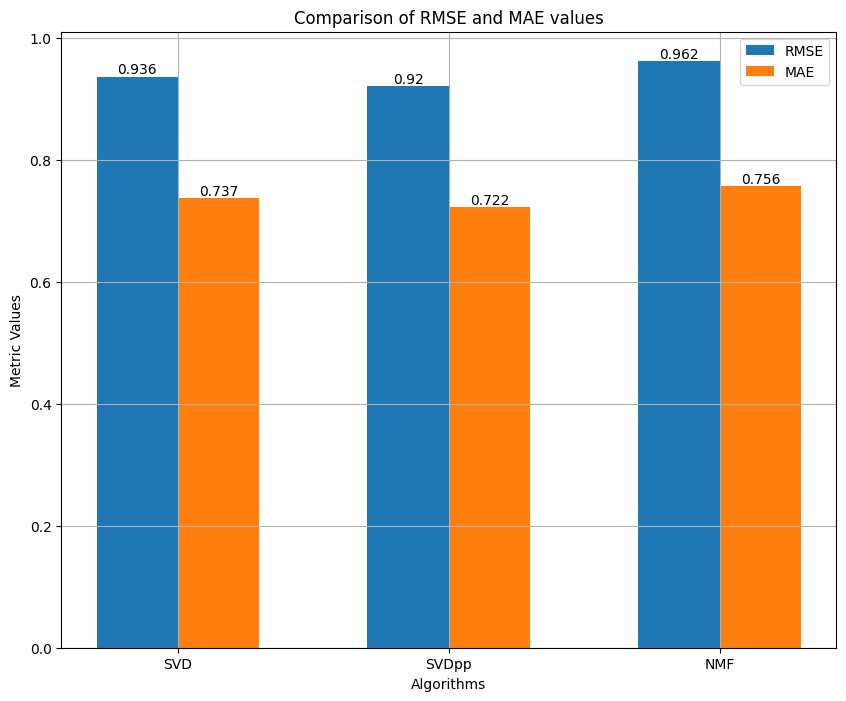

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Налаштування розміру графіку
plt.figure(figsize=(10, 8))

# Підготовка даних
x = np.arange(len(algo_result.columns))  # Створюємо масив даниих для осі X

# Побудова стовпчикових діаграм  для RMSE і MAE
plt.bar(x - 0.15, algo_result.iloc[0], width=0.3, label='RMSE')
plt.bar(x + 0.15, algo_result.iloc[1], width=0.3, label='MAE')

# Добавляємо текстові мітки на стовпчиках
for index, value in enumerate(algo_result.iloc[0]):
    plt.text(index - 0.15, value, str(round(value, 3)), ha='center', va='bottom')

for index, value in enumerate(algo_result.iloc[1]):
    plt.text(index + 0.15, value, str(round(value, 3)), ha='center', va='bottom')

# Добавляємо сітку
plt.grid(True)
plt.legend()

# Добавляємо текстові мітки на осі X
plt.xticks(x, algo_result.columns)

plt.title('Comparison of RMSE and MAE values')
plt.xlabel('Algorithms')
plt.ylabel('Metric Values')
plt.show()


# Аналіз результатів і висновки

execution_time_SVD

In [ ]:
print("+"*100)
print(f"Точність меделі алгоритм SVD :\n  RMSE = {svd_rmse} \n  MSE = {svd_mse}")
print(f"Час затрачений на навчання Algorithm SVD : {execution_time_SVD:.4f} секунд")
print("+"*100)


print(f"Точність меделі алгоритм SVDpp :\n  RMSE = {svdpp_rmse} \n  MSE = {svdpp_mse}")
print(f"Час затрачений на навчання Algorithm SVDpp : {execution_time_SVDpp:.4f} секунд")
print("+"*100)

print(f"Точність меделі алгоритм NMF :\n  RMSE = {NMF_rmse} \n  MSE = {NMF_mse}")
print(f"Час затрачений на навчання Algorithm NMF : {execution_time_NMF:.4f} секунд")
print("+"*100)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Точність меделі алгоритм SVD :
  RMSE = 0.9348678496013297 
  MSE = 0.8739778962182144
Час затрачений на навчання Algorithm SVD : 1.2941 секунд
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Точність меделі алгоритм SVDpp :
  RMSE = 0.9167962746442739 
  MSE = 0.8405154092016189
Час затрачений на навчання Algorithm SVDpp : 26.4428 секунд
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Точність меделі алгоритм NMF :
  RMSE = 0.9638615796336838 
  MSE = 0.9290291446939402
Час затрачений на навчання Algorithm NMF : 2.3587 секунд
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Аназізуючи результати роботи 3 запропонованих алгоритмів для аналізу запропонованого в завданні дата сету можна зробити кілька висновків:
1. Результати розрахунку точності моделі і часу навчання, близькі до результатів розрахованих в корс- валідації для цих алгоритмів .

  **Висновок:** разрахунки підтверджуються двома методами що говорить про правильність проведених розрахунків.   

2. Алгоритм **SVD** має найменший час навчання.   
   Алгоритм **NMF** має дещо більший час навчання про те кращу точність моделі.   
   Алгоритм **SVDpp** має найгірші результати точності так і в рази більше витрачає часу на навчання моделі.   

  **Висновок:** Найбільш ефективним алгоритмом для запропонованого Датасету є **NMF** (Найвища точність , відносно невеликий час навчання).  
  Якщо критичним є саме параметер "час навчання" краще оберати **SVD** (Дещо менша точність , найшвидший час навчання) .  
  Найменш ефективним , з запропонованих алгоритмів , для даного Датасету є **SVD++(SVDpp)**.

Як можна побачити з отриманих результатів алгоритм NMF показує кращу ефективність порівняно з SVD і SVDpp з бібліотеки surprise для даного датасету movielens